# ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТБОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

ЗАДАНИЕ №1.
1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.
2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).
4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.


ЗАДАНИЕ №2**.
1. Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).
2. Выполнить кластеризацию преобразованных в пункте 1 данных с помощью Вашей реализации алгоритма KMeans из ЛР6.

In [51]:
from sklearn.metrics import f1_score, r2_score, recall_score, precision_score, mean_squared_error
import pandas as pd
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from yellowbrick.model_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, f1_score, accuracy_score, recall_score, cohen_kappa_score
import xgboost as xgb

### Вспомогательный функции

In [52]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

## Загрузка и разбиение на выборки

In [53]:
data_reg = pd.read_csv("filteredNotes/Lab3.csv")
data_class = pd.read_csv("filteredNotes/Lab4.csv")

In [54]:
X_reg = data_reg.drop(["price", "Unnamed: 0"], axis=1)
y_reg = data_reg["price"]
X_reg.shape

(21399, 13)

In [55]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_reg_scaled = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)

In [56]:
X_class = data_class.drop(["bomb_planted", "Unnamed: 0"], axis=1)
y_class = data_class["bomb_planted"]
X_class.shape

(111988, 14)

In [57]:
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_class_scaled = pd.DataFrame(X_class_scaled, columns=X_class.columns)

## Задание №1

### VarianceThreshold

#### Regression

In [58]:
variance_threshold = 1
selection = VarianceThreshold(threshold=variance_threshold)
X_reg_vt=selection.fit_transform(X_reg_scaled)
X_reg_vt.shape

(21399, 4)

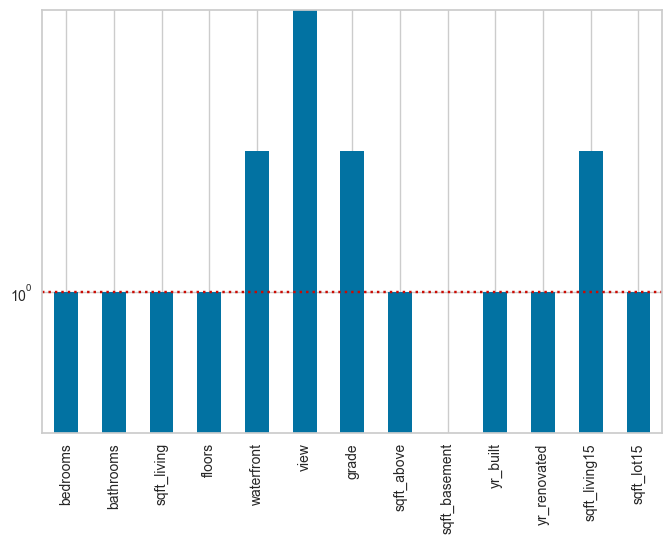

In [59]:
ax = pd.Series(selection.variances_, index=X_reg_scaled.columns).plot(kind='bar', logy=True)
ax.axhline(variance_threshold, ls='dotted', c='r')

#### Classification

In [60]:
variance_threshold = 1
selection = VarianceThreshold(threshold=variance_threshold)
X_class_vt=selection.fit_transform(X_class_scaled)
X_class_vt.shape


(111988, 7)

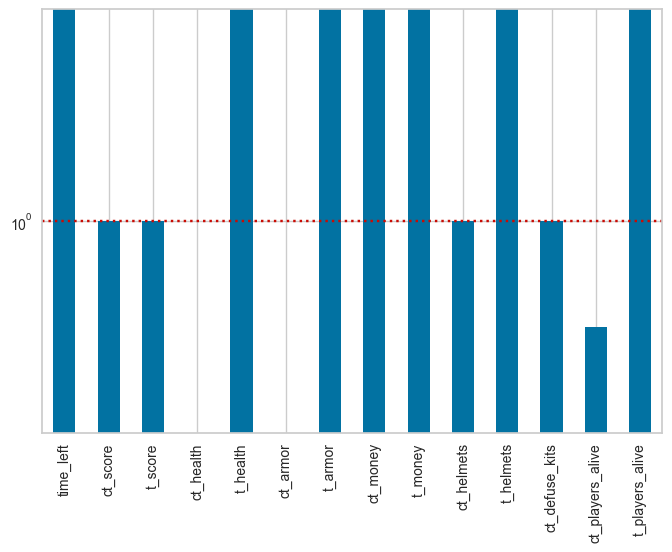

In [61]:
ax = pd.Series(selection.variances_, index=X_class_scaled.columns).plot(kind='bar', logy=True)
ax.axhline(variance_threshold, ls='dotted', c='r')

### SelectKBest

#### Regression

In [62]:
skb = SelectKBest(k=6)
X_reg_skb = skb.fit_transform(X_reg_scaled, y_reg)

In [63]:
X_reg_skb = pd.DataFrame(X_reg_skb, columns=skb.get_feature_names_out())
X_reg_skb

,bathrooms,sqft_living,waterfront,grade,sqft_above,sqft_living15
0,-1.479834,-1.022522,-0.084861,-0.554604,-0.746990,-0.952300
1,0.205225,0.610845,-0.084861,-0.554604,0.511275,-0.426266
2,-1.479834,-1.504307,-0.084861,-1.429887,-1.268090,1.121775
3,1.216260,-0.105956,-0.084861,-0.554604,-0.912217,-0.922241
4,-0.131787,-0.434980,-0.084861,0.320679,-0.111503,-0.260942
...,...,...,...,...,...,...
21394,0.542236,-0.611243,-0.084861,0.320679,-0.302149,-0.666739
21395,0.542236,0.305323,-0.084861,0.320679,0.689211,-0.215853
21396,-1.816846,-1.210536,-0.084861,-0.554604,-0.950346,-1.433244
21397,0.542236,-0.528987,-0.084861,0.320679,-0.213181,-0.847093


#### Classification

In [64]:
skb = SelectKBest(k=6)
X_class_skb = skb.fit_transform(X_class_scaled, y_class)

In [65]:
X_class_skb = pd.DataFrame(X_class_skb, columns=skb.get_feature_names_out())
X_class_skb

,time_left,ct_health,t_health,ct_armor,ct_players_alive,t_players_alive
0,1.541849,0.690483,0.724123,-1.904517,0.624527,0.620018
1,1.182544,0.690483,0.724123,0.469284,0.624527,0.620018
2,0.046101,-0.121512,0.019392,-0.159773,-0.191133,-0.179634
3,-0.332713,-0.121512,0.019392,-0.159773,-0.191133,-0.179634
4,1.541281,0.690483,0.724123,-0.765093,0.624527,0.620018
...,...,...,...,...,...,...
111983,-1.480899,-1.544366,-1.094082,-0.747289,-1.822453,-0.179634
111984,1.540523,0.690483,0.724123,-1.340739,0.624527,0.620018
111985,0.404080,0.690483,0.724123,1.033061,0.624527,0.620018
111986,0.025266,0.690483,0.724123,1.033061,0.624527,0.620018


### RFE

#### Regression

In [66]:
tree = DecisionTreeRegressor().fit(X_reg_scaled, y_reg)

In [67]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_reg_scaled, y_reg)
X_reg_rfe = pd.DataFrame(rfe.transform(X_reg_scaled), columns=rfe.get_feature_names_out())
X_reg_rfe

,sqft_living,grade,yr_built,sqft_living15
0,-1.022522,-0.554604,-0.541068,-0.952300
1,0.610845,-0.554604,-0.677278,-0.426266
2,-1.504307,-1.429887,-1.290224,1.121775
3,-0.105956,-0.554604,-0.200542,-0.922241
4,-0.434980,0.320679,0.548614,-0.260942
...,...,...,...,...
21394,-0.611243,0.320679,1.297770,-0.666739
21395,0.305323,0.320679,1.468033,-0.215853
21396,-1.210536,-0.554604,1.297770,-1.433244
21397,-0.528987,0.320679,1.127508,-0.847093


#### Classification

In [68]:
tree = DecisionTreeClassifier().fit(X_class_scaled, y_class)

In [69]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_class_scaled, y_class)
X_class_rfe = pd.DataFrame(rfe.transform(X_class_scaled), columns=rfe.get_feature_names_out())
X_class_rfe

,time_left,t_health,ct_armor,t_money
0,1.541849,0.724123,-1.904517,-0.619492
1,1.182544,0.724123,0.469284,-0.894910
2,0.046101,0.019392,-0.159773,-0.907242
3,-0.332713,0.019392,-0.159773,-0.907242
4,1.541281,0.724123,-0.765093,-0.064548
...,...,...,...,...
111983,-1.480899,-1.094082,-0.747289,-0.459175
111984,1.540523,0.724123,-1.340739,1.016567
111985,0.404080,0.724123,1.033061,-0.397514
111986,0.025266,0.724123,1.033061,-0.397514


### PCA

#### Regression

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=2)
X_reg_pca = pca.fit_transform(X_reg_scaled, y_reg)
X_reg_pca.shape

(21399, 2)

In [72]:
sum(pca.explained_variance_ratio_)

0.5180015581850403

#### Classifiction

In [73]:
pca = PCA(n_components=2)
X_class_pca = pca.fit_transform(X_class_scaled, y_class)
X_class_pca.shape

(111988, 2)

In [74]:
sum(pca.explained_variance_ratio_)

0.5089126036808809

### TSNE

#### Regression

In [75]:
tsne = TSNE(n_components=2)
X_reg_tsne = tsne.fit_transform(X_reg_scaled)

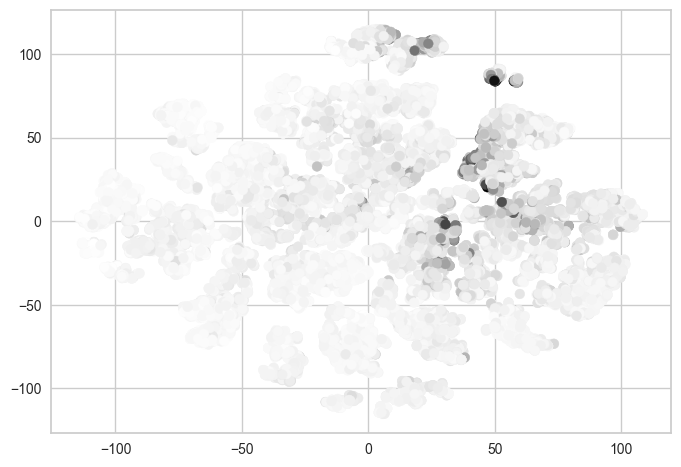

In [76]:
plt.scatter(X_reg_tsne[:, 0], X_reg_tsne[:, 1], c=y_reg)

#### Classification

In [77]:
tsne = TSNE(n_components=2)
X_class_tsne = tsne.fit_transform(X_class_scaled)

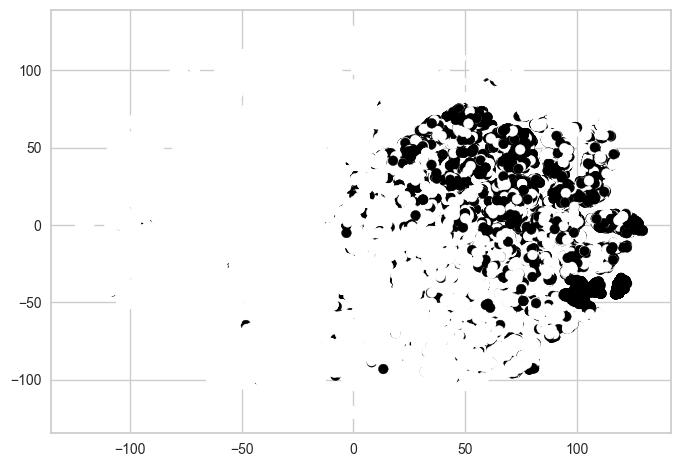

In [78]:
plt.scatter(X_class_tsne[:, 0], X_class_tsne[:, 1], c=y_class)

### Isomap

#### Regression

In [79]:
isomap = Isomap(n_components=2)
X_reg_isomap = isomap.fit_transform(X_reg_scaled)

c:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_mat

In [ ]:
plt.scatter(X_reg_isomap[:,0], X_reg_isomap[:,1], c=y_reg)

#### Classification

In [ ]:
isomap = Isomap(n_components=2)
X_class_isomap = isomap.fit_transform(X_class_scaled)

In [ ]:
plt.scatter(X_class_isomap[:,0], X_class_isomap[:,1], c=y_class)

### Выбор лучшего метода понижения размерности для моих данных

In [ ]:
sampleClassification = {
    "VarianceThreshold": X_class_vt,
    "SelectKBest": X_class_skb,
    "RFE": X_class_rfe,
    "PCA": X_class_pca,
    "TSNE": X_class_tsne,
    "Isomap": X_class_isomap,
}

In [ ]:
sampleRegression = {
    "VarianceThreshold": X_reg_vt,
    "SelectKBest": X_reg_skb,
    "RFE": X_reg_rfe,
    "PCA": X_reg_pca,
    "TSNE": X_reg_tsne,
    "Isomap": X_reg_isomap,
}

Моделью для регресси я выбрал CatboostRegressor, для классификации Light Gradient Boosting Machine

In [ ]:
class ChooseBestSampleForRegressionNClassification:
    def __init__(self, sampleClassification, sampleRegression, y_class, y_reg):
        self.sampleClassification = sampleClassification
        self.sampleRegression = sampleRegression
        self.y_class = y_class
        self.y_reg = y_reg

    def BestSampleRegressor(self):
        metricSamples = {}
        for key, value in self.sampleRegression:
            X_train, X_test, y_train, y_test = train_test_split(
                value, self.y, test_size=0.2, random_state=15
            )

            nm = NearMiss()
            X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

            train_data = Pool(data=X_train, label=y_train)

            test_data = Pool(data=X_test, label=y_test)

            model = CatBoostRegressor()
            model.fit(train_data, plot=True)

            y_pred = model.predict(test_data)

            metricSamples[key] = r2_score(y_test, y_pred)

        sortedMetricSamples = sorted(
            metricSamples.items(), key=lambda item: item[1], reverse=True
        )
        print(
            f"Лучший результат показал {(list(sortedMetricSamples.items())[0]).key} при значении r2_score = {(list(sortedMetricSamples.items())[0]).value}"
        )
        
    def BestSampleClassification(self):
        metricSamples = {}
        for key, value in self.sampleClassification:
            X_train, X_test, y_train, y_test = train_test_split(
                value, self.y, test_size=0.2, random_state=15
            )

            model = xgb.XGBClassifier(random_state=17)

            model.fit(X_train,y_train)
            
            y_pred = model.predict(X_test)

            metricSamples[key] = accuracy_score(y_test, y_pred)

        sortedMetricSamples = sorted(
            metricSamples.items(), key=lambda item: item[1], reverse=True
        )
        print(
            f"Лучший результат показал {(list(sortedMetricSamples.items())[0]).key} при значении accuracy_score = {(list(sortedMetricSamples.items())[0]).value}"
        )

In [ ]:
c = ChooseBestSampleForRegressionNClassification(
    sampleClassification, sampleRegression, y_class, y_reg
)

In [ ]:
c.BestSampleRegressor()